# **Eksperimen SML - GPU Dataset**
**Nama:** Shidqi Ahmad Musyaffa'

Notebook ini berisi eksperimen preprocessing pada dataset GPU untuk memenuhi Kriteria 1 SML.

# **1. Perkenalan Dataset**

Dataset yang digunakan adalah **GPU Data** yang berisi spesifikasi berbagai GPU dari manufacturer seperti NVIDIA, AMD, dan Intel.

**Informasi Dataset:**
- Sumber: Public repository
- Jumlah data: 2891 baris
- Jumlah fitur: 16 kolom
- Fitur utama: manufacturer, productName, releaseYear, memSize, gpuClock, memClock, dll.

# **2. Import Library**

Mengimpor library yang dibutuhkan untuk analisis data dan preprocessing.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("Libraries imported successfully!")

Libraries imported successfully!


# **3. Memuat Dataset**

Memuat dataset GPU dari folder dataset.

In [2]:
# Load dataset
df = pd.read_csv('../dataset/gpu_data.csv')

# Tampilkan informasi dasar
print("=" * 50)
print("INFORMASI DATASET")
print("=" * 50)
print(f"\nShape dataset: {df.shape}")
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

INFORMASI DATASET

Shape dataset: (2889, 16)
Jumlah baris: 2889
Jumlah kolom: 16


In [3]:
# Tampilkan 5 baris pertama
print("\n5 Baris Pertama Dataset:")
df.head()


5 Baris Pertama Dataset:


,manufacturer,productName,releaseYear,memSize,memBusWidth,gpuClock,memClock,unifiedShader,tmu,rop,pixelShader,vertexShader,igp,bus,memType,gpuChip
0,NVIDIA,GeForce RTX 4050,2023.0,8.0,128.0,1925,2250.0,3840.0,120,48,NaN,NaN,No,PCIe 4.0 x16,GDDR6,AD106
1,Intel,Arc A350M,2022.0,4.0,64.0,300,1500.0,768.0,48,24,NaN,NaN,No,PCIe 4.0 x8,GDDR6,DG2-128
2,Intel,Arc A370M,2022.0,4.0,64.0,300,1500.0,1024.0,64,32,NaN,NaN,No,PCIe 4.0 x8,GDDR6,DG2-128
3,Intel,Arc A380,2022.0,4.0,64.0,300,1500.0,1024.0,64,32,NaN,NaN,No,PCIe 4.0 x8,GDDR6,DG2-128
4,Intel,Arc A550M,2022.0,8.0,128.0,300,1500.0,2048.0,128,64,NaN,NaN,No,PCIe 4.0 x16,GDDR6,DG2-512


In [4]:
# Tampilkan 5 baris terakhir
print("\n5 Baris Terakhir Dataset:")
df.tail()


5 Baris Terakhir Dataset:


,manufacturer,productName,releaseYear,memSize,memBusWidth,gpuClock,memClock,unifiedShader,tmu,rop,pixelShader,vertexShader,igp,bus,memType,gpuChip
2884,3dfx,Voodoo5 5000 AGP,NaN,0.016,128.0,166,166.0,NaN,2,2,2.0,0.0,No,AGP 4x,SDR,VSA-100
2885,3dfx,Voodoo5 5000 PCI,NaN,0.016,128.0,166,166.0,NaN,2,2,2.0,0.0,No,PCI,SDR,VSA-100
2886,3dfx,Voodoo5 6000,NaN,0.032,128.0,166,166.0,NaN,2,2,2.0,0.0,No,AGP 4x,SDR,VSA-100
2887,Intel,Xe DG1,NaN,4.000,128.0,900,2133.0,640.0,40,20,NaN,NaN,No,PCIe 4.0 x8,LPDDR4X,DG1
2888,Intel,Xe DG1-SDV,NaN,8.000,128.0,900,2133.0,768.0,48,24,NaN,NaN,No,PCIe 4.0 x8,LPDDR4X,DG1


In [5]:
# Tampilkan nama kolom
print("\nNama Kolom:")
print(df.columns.tolist())


Nama Kolom:
['manufacturer', 'productName', 'releaseYear', 'memSize', 'memBusWidth', 'gpuClock', 'memClock', 'unifiedShader', 'tmu', 'rop', 'pixelShader', 'vertexShader', 'igp', 'bus', 'memType', 'gpuChip']


# **4. Exploratory Data Analysis (EDA)**

Melakukan analisis eksploratif untuk memahami karakteristik dataset.

## 4.1 Cek Tipe Data

In [6]:
# Cek tipe data setiap kolom
print("Tipe Data Setiap Kolom:")
print(df.dtypes)

Tipe Data Setiap Kolom:
manufacturer      object
productName       object
releaseYear      float64
memSize          float64
memBusWidth      float64
gpuClock           int64
memClock         float64
unifiedShader    float64
tmu                int64
rop                int64
pixelShader      float64
vertexShader     float64
igp               object
bus               object
memType           object
gpuChip           object
dtype: object


In [7]:
# Info lengkap dataset
print("\nInfo Dataset:")
df.info()


Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2889 entries, 0 to 2888
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   manufacturer   2889 non-null   object 
 1   productName    2889 non-null   object 
 2   releaseYear    2845 non-null   float64
 3   memSize        2477 non-null   float64
 4   memBusWidth    2477 non-null   float64
 5   gpuClock       2889 non-null   int64  
 6   memClock       2477 non-null   float64
 7   unifiedShader  2065 non-null   float64
 8   tmu            2889 non-null   int64  
 9   rop            2889 non-null   int64  
 10  pixelShader    824 non-null    float64
 11  vertexShader   824 non-null    float64
 12  igp            2889 non-null   object 
 13  bus            2889 non-null   object 
 14  memType        2889 non-null   object 
 15  gpuChip        2889 non-null   object 
dtypes: float64(7), int64(3), object(6)
memory usage: 361.3+ KB


## 4.2 Cek Missing Values

In [8]:
# Cek missing values
print("Missing Values per Kolom:")
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage (%)': missing_percentage.round(2)
})

print(missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False))
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

Missing Values per Kolom:
               Missing Count  Percentage (%)
pixelShader             2065           71.48
vertexShader            2065           71.48
unifiedShader            824           28.52
memSize                  412           14.26
memBusWidth              412           14.26
memClock                 412           14.26
releaseYear               44            1.52

Total missing values: 6234


In [9]:
# Cek empty strings (bukan NaN tapi string kosong)
print("\nCek Empty Strings per Kolom:")
for col in df.columns:
    if df[col].dtype == 'object':
        empty_count = (df[col] == '').sum()
        if empty_count > 0:
            print(f"{col}: {empty_count} empty strings")


Cek Empty Strings per Kolom:


## 4.3 Statistik Deskriptif

In [10]:
# Statistik deskriptif untuk kolom numerik
print("Statistik Deskriptif (Numerik):")
df.describe()

Statistik Deskriptif (Numerik):


,releaseYear,memSize,memBusWidth,gpuClock,memClock,unifiedShader,tmu,rop,pixelShader,vertexShader
count,2845.000000,2477.000000,2477.000000,2889.000000,2477.000000,2065.000000,2889.000000,2889.000000,824.000000,824.000000
mean,2010.691388,3.113803,274.874445,661.126687,868.578119,1032.937530,47.429214,18.750087,6.739078,2.622573
std,6.193125,7.175399,653.163896,374.481450,509.987396,1662.834618,73.014849,25.067896,8.091586,2.579388
min,1986.000000,0.000032,32.000000,10.000000,5.000000,8.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,0.256000,128.000000,400.000000,400.000000,144.000000,8.000000,4.000000,2.000000,0.000000
50%,2011.000000,1.024000,128.000000,600.000000,837.000000,384.000000,20.000000,8.000000,4.000000,2.000000
75%,2015.000000,3.000000,256.000000,875.000000,1250.000000,1280.000000,56.000000,24.000000,8.000000,4.000000
max,2023.000000,128.000000,8192.000000,2331.000000,2257.000000,17408.000000,880.000000,256.000000,48.000000,24.000000


In [11]:
# Statistik deskriptif untuk kolom kategorikal
print("\nStatistik Deskriptif (Kategorikal):")
df.describe(include=['object'])


Statistik Deskriptif (Kategorikal):


,manufacturer,productName,igp,bus,memType,gpuChip
count,2889,2889,2889,2889,2889,2889
unique,8,2585,2,30,27,474
top,NVIDIA,HD Graphics,No,PCIe 2.0 x16,GDDR5,GK104
freq,1272,10,2477,563,724,51


In [12]:
# Distribusi nilai unik per kolom kategorikal
print("\nNilai Unik per Kolom Kategorikal:")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts().head(10))


Nilai Unik per Kolom Kategorikal:

manufacturer:
manufacturer
NVIDIA    1272
AMD        755
ATI        601
Intel      172
Matrox      34
3dfx        30
XGI         16
Sony         9
Name: count, dtype: int64

productName:
productName
HD Graphics               10
UHD Graphics               6
UHD Graphics 630           5
ION                        5
Radeon Vega 8 Mobile       5
GeForce GT 555M            5
Radeon Vega 3 Embedded     5
GeForce GT 635M            4
GMA 3000                   4
GeForce 6800 XT            4
Name: count, dtype: int64

igp:
igp
No     2477
Yes     412
Name: count, dtype: int64

bus:
bus
PCIe 2.0 x16    563
PCIe 3.0 x16    498
PCIe 1.0 x16    336
AGP 8x          207
IGP             193
PCIe 3.0 x8     172
PCI             150
AGP 4x          145
PCIe 4.0 x16    108
Ring Bus        107
Name: count, dtype: int64

memType:
memType
GDDR5            724
GDDR3            471
System Shared    412
DDR              336
DDR3             313
GDDR6            191
DDR2     

## 4.4 Visualisasi Data

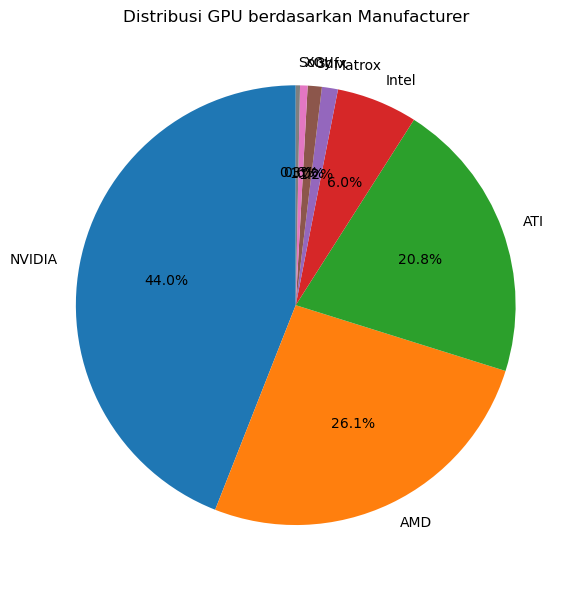

In [13]:
# Distribusi Manufacturer
plt.figure(figsize=(10, 6))
manufacturer_counts = df['manufacturer'].value_counts()
plt.pie(manufacturer_counts, labels=manufacturer_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi GPU berdasarkan Manufacturer')
plt.tight_layout()
plt.show()

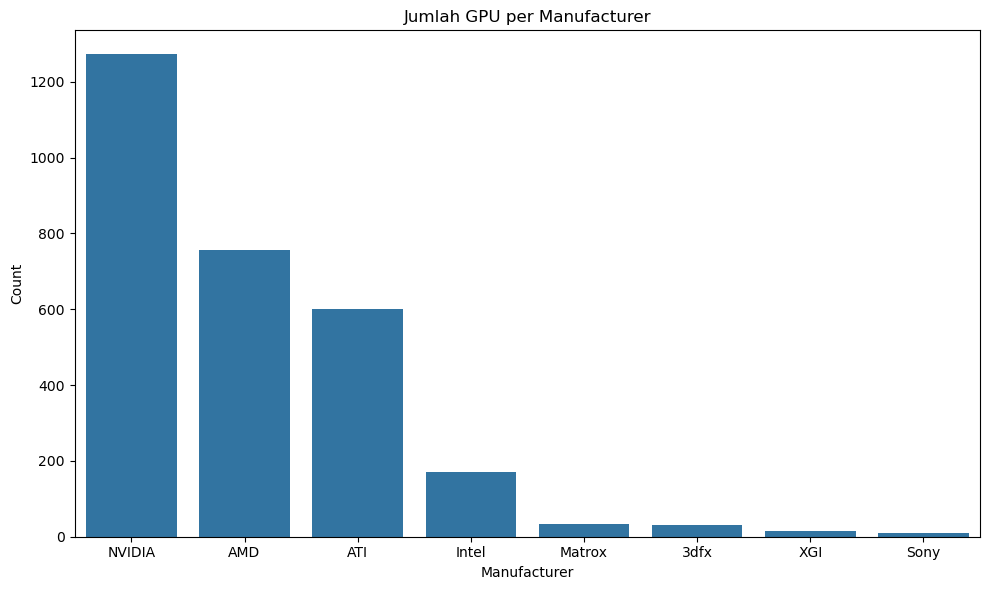

In [14]:
# Bar chart Manufacturer
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='manufacturer', order=df['manufacturer'].value_counts().index)
plt.title('Jumlah GPU per Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

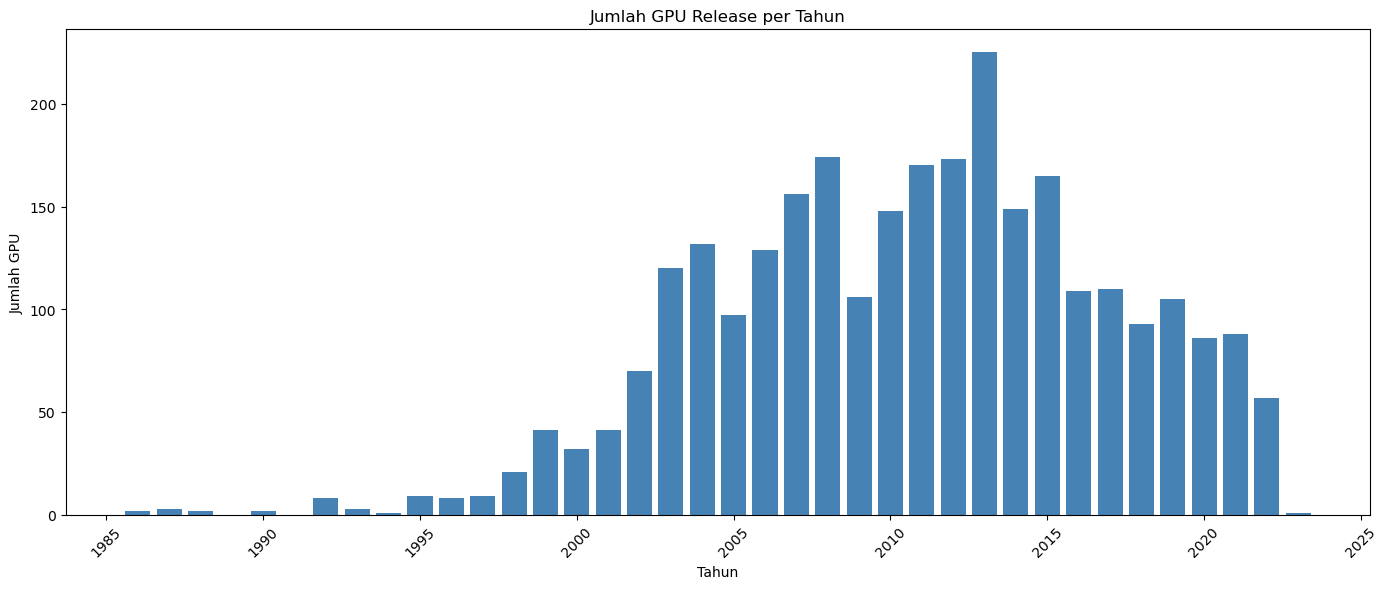

In [15]:
# Trend GPU release per tahun
plt.figure(figsize=(14, 6))
year_counts = df['releaseYear'].value_counts().sort_index()
plt.bar(year_counts.index, year_counts.values, color='steelblue')
plt.title('Jumlah GPU Release per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah GPU')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

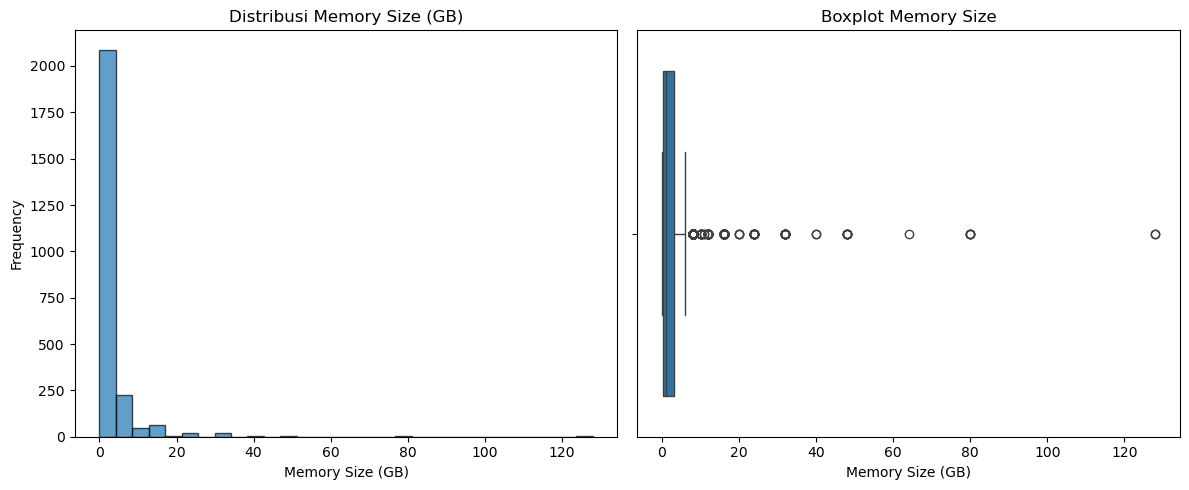

In [16]:
# Distribusi Memory Size
plt.figure(figsize=(12, 5))
df_mem = df[df['memSize'].notna() & (df['memSize'] != '')]
df_mem['memSize'] = pd.to_numeric(df_mem['memSize'], errors='coerce')
df_mem = df_mem[df_mem['memSize'].notna()]

plt.subplot(1, 2, 1)
plt.hist(df_mem['memSize'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribusi Memory Size (GB)')
plt.xlabel('Memory Size (GB)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_mem['memSize'])
plt.title('Boxplot Memory Size')
plt.xlabel('Memory Size (GB)')

plt.tight_layout()
plt.show()

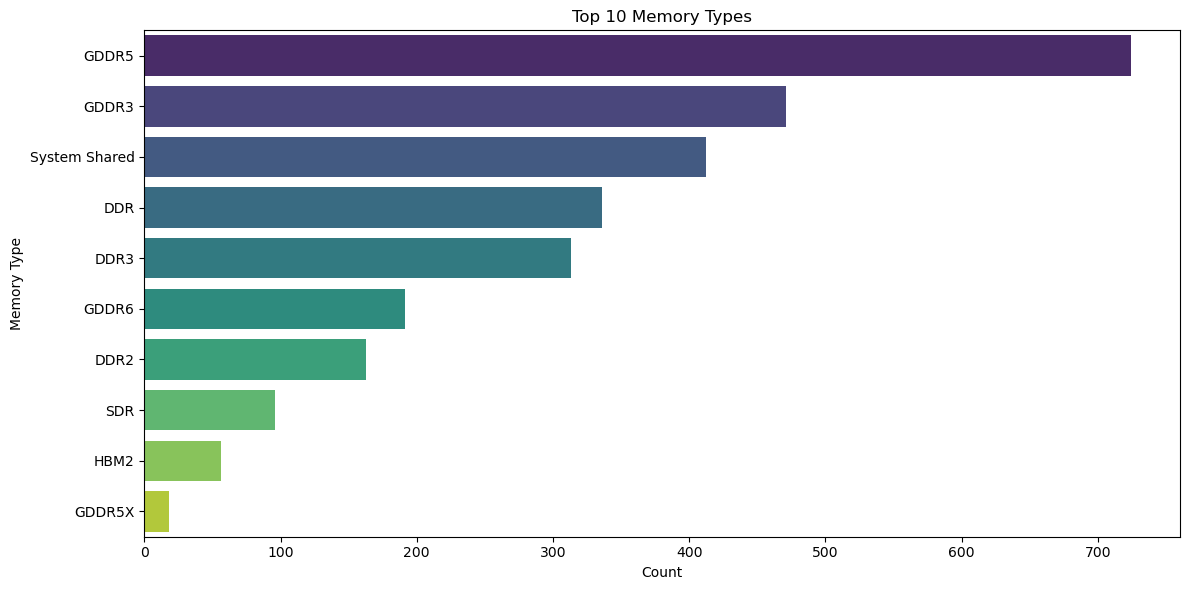

In [17]:
# Distribusi Memory Type
plt.figure(figsize=(12, 6))
memtype_counts = df['memType'].value_counts().head(10)
sns.barplot(x=memtype_counts.values, y=memtype_counts.index, palette='viridis')
plt.title('Top 10 Memory Types')
plt.xlabel('Count')
plt.ylabel('Memory Type')
plt.tight_layout()
plt.show()

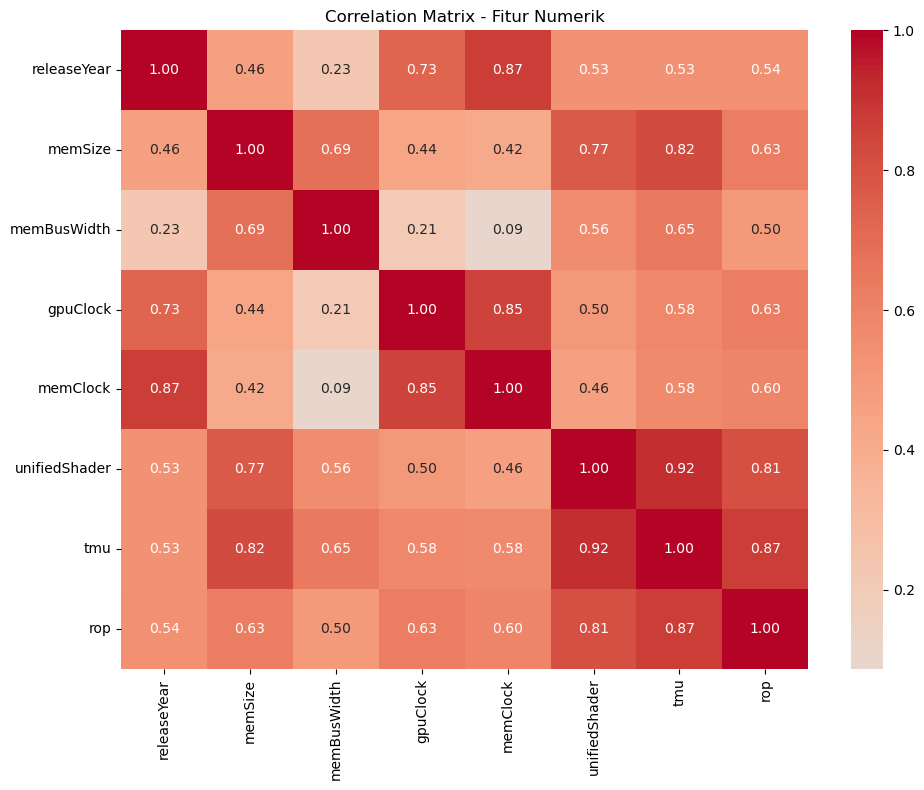

In [18]:
# Heatmap korelasi fitur numerik
numeric_cols = ['releaseYear', 'memSize', 'memBusWidth', 'gpuClock', 'memClock', 'unifiedShader', 'tmu', 'rop']
df_numeric = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(10, 8))
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix - Fitur Numerik')
plt.tight_layout()
plt.show()

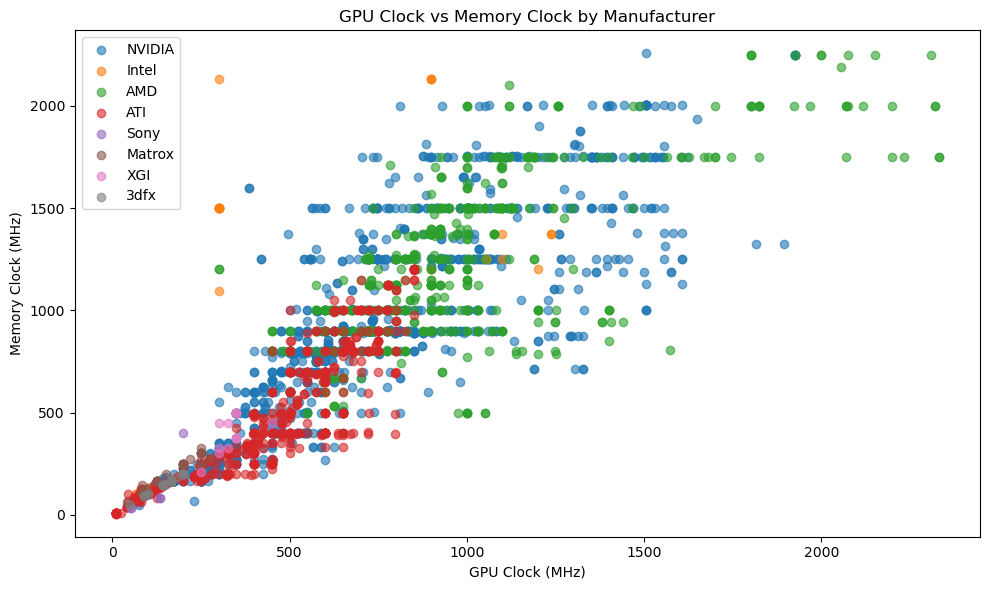

In [19]:
# GPU Clock vs Memory Clock scatter plot
df_clock = df[['gpuClock', 'memClock', 'manufacturer']].copy()
df_clock['gpuClock'] = pd.to_numeric(df_clock['gpuClock'], errors='coerce')
df_clock['memClock'] = pd.to_numeric(df_clock['memClock'], errors='coerce')
df_clock = df_clock.dropna()

plt.figure(figsize=(10, 6))
for manufacturer in df_clock['manufacturer'].unique():
    subset = df_clock[df_clock['manufacturer'] == manufacturer]
    plt.scatter(subset['gpuClock'], subset['memClock'], label=manufacturer, alpha=0.6)

plt.xlabel('GPU Clock (MHz)')
plt.ylabel('Memory Clock (MHz)')
plt.title('GPU Clock vs Memory Clock by Manufacturer')
plt.legend()
plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Tahap preprocessing untuk mempersiapkan data agar siap digunakan dalam model machine learning.

## 5.1 Handling Missing Values

In [20]:
# Buat copy dataset untuk preprocessing
df_processed = df.copy()

# Tampilkan kondisi awal
print("Kondisi Awal Dataset:")
print(f"Shape: {df_processed.shape}")
print(f"Total missing values: {df_processed.isnull().sum().sum()}")

Kondisi Awal Dataset:
Shape: (2889, 16)
Total missing values: 6234


In [21]:
# Konversi kolom numerik dari object ke numeric
numeric_columns = ['memSize', 'memBusWidth', 'gpuClock', 'memClock', 'unifiedShader', 'tmu', 'rop', 'pixelShader', 'vertexShader']

for col in numeric_columns:
    df_processed[col] = pd.to_numeric(df_processed[col], errors='coerce')

print("Tipe data setelah konversi:")
print(df_processed[numeric_columns].dtypes)

Tipe data setelah konversi:
memSize          float64
memBusWidth      float64
gpuClock           int64
memClock         float64
unifiedShader    float64
tmu                int64
rop                int64
pixelShader      float64
vertexShader     float64
dtype: object


In [22]:
# Cek missing values setelah konversi
print("\nMissing Values setelah konversi:")
missing_after = df_processed.isnull().sum()
print(missing_after[missing_after > 0].sort_values(ascending=False))


Missing Values setelah konversi:
pixelShader      2065
vertexShader     2065
unifiedShader     824
memSize           412
memBusWidth       412
memClock          412
releaseYear        44
dtype: int64


In [23]:
# Drop kolom dengan terlalu banyak missing values (pixelShader, vertexShader)
# Kolom ini sudah obsolete karena GPU modern menggunakan Unified Shader
columns_to_drop = ['pixelShader', 'vertexShader']
df_processed = df_processed.drop(columns=columns_to_drop)

print(f"Dropped columns: {columns_to_drop}")
print(f"Shape setelah drop: {df_processed.shape}")

Dropped columns: ['pixelShader', 'vertexShader']
Shape setelah drop: (2889, 14)


In [24]:
# Imputation untuk kolom numerik dengan median (lebih robust terhadap outlier)
numeric_cols_remaining = ['memSize', 'memBusWidth', 'gpuClock', 'memClock', 'unifiedShader', 'tmu', 'rop']

for col in numeric_cols_remaining:
    median_val = df_processed[col].median()
    missing_count = df_processed[col].isnull().sum()
    df_processed[col] = df_processed[col].fillna(median_val)
    print(f"{col}: Filled {missing_count} missing values with median = {median_val}")

print(f"\nTotal missing values setelah imputation: {df_processed.isnull().sum().sum()}")

memSize: Filled 412 missing values with median = 1.024
memBusWidth: Filled 412 missing values with median = 128.0
gpuClock: Filled 0 missing values with median = 600.0
memClock: Filled 412 missing values with median = 837.0
unifiedShader: Filled 824 missing values with median = 384.0
tmu: Filled 0 missing values with median = 20.0
rop: Filled 0 missing values with median = 8.0

Total missing values setelah imputation: 44


## 5.2 Encoding Fitur Kategorikal

In [25]:
# Identifikasi kolom kategorikal
categorical_columns = df_processed.select_dtypes(include=['object']).columns.tolist()
print(f"Kolom Kategorikal: {categorical_columns}")

Kolom Kategorikal: ['manufacturer', 'productName', 'igp', 'bus', 'memType', 'gpuChip']


In [26]:
# Simpan mapping untuk referensi
label_encoders = {}

# Encode kolom yang akan digunakan untuk model
columns_to_encode = ['manufacturer', 'igp', 'bus', 'memType', 'gpuChip']

for col in columns_to_encode:
    le = LabelEncoder()
    df_processed[col + '_encoded'] = le.fit_transform(df_processed[col].astype(str))
    label_encoders[col] = le
    print(f"{col}: {len(le.classes_)} unique values encoded")
    
# Tampilkan contoh mapping untuk manufacturer
print(f"\nContoh mapping manufacturer:")
for i, label in enumerate(label_encoders['manufacturer'].classes_):
    print(f"  {label} -> {i}")

manufacturer: 8 unique values encoded
igp: 2 unique values encoded
bus: 30 unique values encoded
memType: 27 unique values encoded
gpuChip: 474 unique values encoded

Contoh mapping manufacturer:
  3dfx -> 0
  AMD -> 1
  ATI -> 2
  Intel -> 3
  Matrox -> 4
  NVIDIA -> 5
  Sony -> 6
  XGI -> 7


In [27]:
# Drop kolom original categorical (kecuali productName yang hanya untuk referensi)
columns_to_keep_original = ['productName']  # Untuk referensi saja, tidak untuk training
columns_to_remove = [col for col in columns_to_encode if col not in columns_to_keep_original]

df_processed = df_processed.drop(columns=columns_to_remove)
print(f"\nKolom setelah encoding:")
print(df_processed.columns.tolist())


Kolom setelah encoding:
['productName', 'releaseYear', 'memSize', 'memBusWidth', 'gpuClock', 'memClock', 'unifiedShader', 'tmu', 'rop', 'manufacturer_encoded', 'igp_encoded', 'bus_encoded', 'memType_encoded', 'gpuChip_encoded']


## 5.3 Scaling / Normalisasi

In [28]:
# Identifikasi kolom numerik untuk scaling
columns_to_scale = ['releaseYear', 'memSize', 'memBusWidth', 'gpuClock', 'memClock', 'unifiedShader', 'tmu', 'rop']

# Gunakan MinMaxScaler (range 0-1)
scaler = MinMaxScaler()

# Scale dan buat kolom baru
for col in columns_to_scale:
    df_processed[col + '_scaled'] = scaler.fit_transform(df_processed[[col]])
    
print("Kolom yang sudah di-scale:")
scaled_cols = [col + '_scaled' for col in columns_to_scale]
print(df_processed[scaled_cols].describe())

Kolom yang sudah di-scale:
       releaseYear_scaled  memSize_scaled  memBusWidth_scaled  \
count         2845.000000     2889.000000         2889.000000   
mean             0.667335        0.021998            0.027197   
std              0.167382        0.052219            0.074382   
min              0.000000        0.000000            0.000000   
25%              0.540541        0.002000            0.011765   
50%              0.675676        0.008000            0.011765   
75%              0.783784        0.015625            0.027451   
max              1.000000        1.000000            1.000000   

       gpuClock_scaled  memClock_scaled  unifiedShader_scaled   tmu_scaled  \
count      2889.000000      2889.000000           2889.000000  2889.000000   
mean          0.280537         0.381472              0.048267     0.053897   
std           0.161345         0.209743              0.082527     0.082971   
min           0.000000         0.000000              0.000000     0.000000 

## 5.4 Feature Selection

In [29]:
# Pilih fitur final untuk dataset siap latih
# Fitur numerik (scaled)
feature_numeric = [col + '_scaled' for col in columns_to_scale]

# Fitur kategorikal (encoded)  
feature_encoded = [col + '_encoded' for col in columns_to_encode]

# Gabungkan semua fitur
final_features = feature_numeric + feature_encoded

print("Final Features untuk Training:")
for i, f in enumerate(final_features, 1):
    print(f"  {i}. {f}")

Final Features untuk Training:
  1. releaseYear_scaled
  2. memSize_scaled
  3. memBusWidth_scaled
  4. gpuClock_scaled
  5. memClock_scaled
  6. unifiedShader_scaled
  7. tmu_scaled
  8. rop_scaled
  9. manufacturer_encoded
  10. igp_encoded
  11. bus_encoded
  12. memType_encoded
  13. gpuChip_encoded


In [30]:
# Buat dataset final
df_final = df_processed[['productName'] + final_features].copy()

print(f"\nShape Dataset Final: {df_final.shape}")
print(f"\nCek missing values: {df_final.isnull().sum().sum()}")
df_final.head()


Shape Dataset Final: (2889, 14)

Cek missing values: 44


,productName,releaseYear_scaled,memSize_scaled,memBusWidth_scaled,gpuClock_scaled,memClock_scaled,unifiedShader_scaled,tmu_scaled,rop_scaled,manufacturer_encoded,igp_encoded,bus_encoded,memType_encoded,gpuChip_encoded
0,GeForce RTX 4050,1.000000,0.06250,0.011765,0.825075,0.996892,0.220230,0.136364,0.18750,5,0,24,13,7
1,Arc A350M,0.972973,0.03125,0.003922,0.124946,0.663854,0.043678,0.054545,0.09375,3,0,26,13,78
2,Arc A370M,0.972973,0.03125,0.003922,0.124946,0.663854,0.058391,0.072727,0.12500,3,0,26,13,78
3,Arc A380,0.972973,0.03125,0.003922,0.124946,0.663854,0.058391,0.072727,0.12500,3,0,26,13,78
4,Arc A550M,0.972973,0.06250,0.011765,0.124946,0.663854,0.117241,0.145455,0.25000,3,0,24,13,79


## 5.5 Simpan Dataset Preprocessing

In [31]:
# Buat folder output jika belum ada
import os
output_folder = 'gpu_data_preprocessing'
os.makedirs(output_folder, exist_ok=True)

# Simpan dataset yang sudah dipreprocessing
output_path = os.path.join(output_folder, 'gpu_data_processed.csv')
df_final.to_csv(output_path, index=False)

print(f"Dataset berhasil disimpan di: {output_path}")
print(f"Jumlah baris: {len(df_final)}")
print(f"Jumlah kolom: {len(df_final.columns)}")

Dataset berhasil disimpan di: gpu_data_preprocessing\gpu_data_processed.csv
Jumlah baris: 2889
Jumlah kolom: 14


In [32]:
# Verifikasi file tersimpan dengan benar
df_check = pd.read_csv(output_path)
print("\nVerifikasi Dataset yang Tersimpan:")
print(f"Shape: {df_check.shape}")
print(f"Missing values: {df_check.isnull().sum().sum()}")
df_check.head()


Verifikasi Dataset yang Tersimpan:
Shape: (2889, 14)
Missing values: 44


,productName,releaseYear_scaled,memSize_scaled,memBusWidth_scaled,gpuClock_scaled,memClock_scaled,unifiedShader_scaled,tmu_scaled,rop_scaled,manufacturer_encoded,igp_encoded,bus_encoded,memType_encoded,gpuChip_encoded
0,GeForce RTX 4050,1.000000,0.06250,0.011765,0.825075,0.996892,0.220230,0.136364,0.18750,5,0,24,13,7
1,Arc A350M,0.972973,0.03125,0.003922,0.124946,0.663854,0.043678,0.054545,0.09375,3,0,26,13,78
2,Arc A370M,0.972973,0.03125,0.003922,0.124946,0.663854,0.058391,0.072727,0.12500,3,0,26,13,78
3,Arc A380,0.972973,0.03125,0.003922,0.124946,0.663854,0.058391,0.072727,0.12500,3,0,26,13,78
4,Arc A550M,0.972973,0.06250,0.011765,0.124946,0.663854,0.117241,0.145455,0.25000,3,0,24,13,79


# **Ringkasan Preprocessing**

Berikut adalah rangkuman langkah preprocessing yang dilakukan:

1. **Load Dataset**: Memuat gpu_data.csv dengan 2891 baris dan 16 kolom

2. **Handling Missing Values**:
   - Konversi kolom numerik dari object ke numeric
   - Drop kolom pixelShader dan vertexShader (terlalu banyak missing, obsolete)
   - Imputation dengan median untuk kolom numerik lainnya

3. **Encoding Kategorikal**:
   - Label Encoding untuk: manufacturer, igp, bus, memType, gpuChip

4. **Scaling/Normalisasi**:
   - MinMaxScaler (0-1) untuk: releaseYear, memSize, memBusWidth, gpuClock, memClock, unifiedShader, tmu, rop

5. **Output**: Dataset siap latih disimpan di `gpu_data_preprocessing/gpu_data_processed.csv`